Initialize. Call the commandoes:

In [1]:
# Initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import math
from math import exp, expm1

Class definition.
The class is defined with the following variables:

Stream is the number or name of the stream

Flow is the flow for the specific stream [=] m3/h

Concentration is the concentration for the specific component [=] mol/m3

The class is now defined:

In [2]:
class BatchReactor:
    def __init__(self, Stream, Flow, Concentration):
        self.Stream = Stream
        self.Flow = Flow
        self.Concentration = Concentration

#For this example the calculations are done with 1 streams obtaining the following name and value:
#For stream number 1 the flow is 100 m3/h and the concentration is 2 mol/m3
batchreactorA = BatchReactor("Stream A", 100, 2)


In [3]:
# The reaction is: A_in -> B + A_out
#Where A_in is the parameters in the class

In [4]:
# Constants definitions
#The time for the inflow is now defined. This specifies for how long the streams will go into the mixer.
#The unit is in hours. For this example the simulation will run for 10 h
T_inflow = 10

#Reactor conversion [0;1]
X_reaction = 0.9

# Reaction rate constant, k:
k_reaction = 1.5

In [5]:
# Variable definition
#The time is now made as an interval going from 1 to the T_inflow value 
time = np.arange(1,T_inflow)

In [6]:
# Volume calculations 
# The volume going into the batch reactor is V = flow*t 
V_in = batchreactorA.Flow*time
#The constant volume after loading time is
V_reactor = batchreactorA.Flow*T_inflow

In [7]:
#The concentrations of A_out and B are now calculated after the reaction

B_concentration = batchreactorA.Concentration*X_reaction

A_out_concentration = batchreactorA.Concentration*(1-X_reaction)

# The values of the concentrations are:
print('The value of CA_out is ' + repr(A_out_concentration) + ', and C_B is ' + repr(B_concentration))

The value of CA_out is 0.19999999999999996, and C_B is 1.8


In [8]:
#The mixing time for the reaction is now calculated for a first order reaction 

def integrand(X_reaction):
    return batchreactorA.Concentration/(k_reaction*(1-X_reaction)*batchreactorA.Concentration)

t_reac, err = quad(integrand, 0, X_reaction)
print(t_reac)

1.535056728662702


In [23]:
# Reaction time as an array
t_reaction = np.arange(0.001, t_reac, 0.01)

In [27]:
#For en reaktion af første orden aftager koncentrationen af reaktanten A eksponentielt med tiden 
C_aftager = batchreactorA.Concentration*np.exp(-k_reaction*t_reaction)




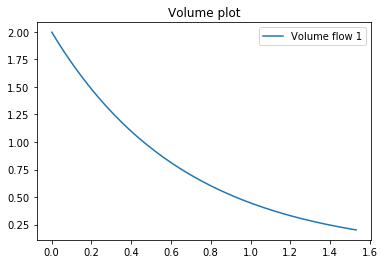

In [28]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t_reaction,C_aftager, label = 'Volume flow 1')
plt.title('Volume plot')
ax.legend()
plt.show()

In [24]:
t_reaction

array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-01, 3.310e-01, 3.410e-01, 3.510e-01,
       3.610e-01, 3.710e-01, 3.810e-01, 3.910e-01, 4.010e-01, 4.110e-01,
       4.210e-01, 4.310e-01, 4.410e-01, 4.510e-01, 4.610e-01, 4.710e-01,
       4.810e-01, 4.910e-01, 5.010e-01, 5.110e-01, 5.210e-01, 5.310e-01,
       5.410e-01, 5.510e-01, 5.610e-01, 5.710e-01, 5.810e-01, 5.910e-01,
       6.010e-01, 6.110e-01, 6.210e-01, 6.310e-01, 6.410e-01, 6.510e-01,
       6.610e-01, 6.710e-01, 6.810e-01, 6.910e-01, 7.010e-01, 7.110e-01,
       7.210e-01, 7.310e-01, 7.410e-01, 7.510e-01, 7.610e-01, 7.710e-01,
       7.810e-01, 7.910e-01, 8.010e-01, 8.110e-01, 

In [15]:
C_aftager

0.44626032029685964

In [26]:
batchreactorA.Concentration*math.exp(-k_reaction)

0.44626032029685964